In [1]:
# covariance matrix
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
cov_data = np.corrcoef(iris.data.T)
print(iris.feature_names)
print(cov_data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


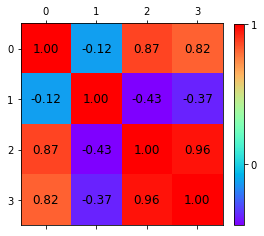

In [15]:
# covariance matrix vizaliaztion (thermal map)
import matplotlib.pyplot as plt
img = plt.matshow(cov_data, cmap = plt.cm.rainbow)
plt.colorbar(img, ticks = [-1,0,1],fraction=0.045)
for x in range(cov_data.shape[0]):
    for y in range(cov_data.shape[1]):
        plt.text(x, y, "%0.2f" % cov_data[x,y],
            size=12, color='black', ha='center', va='center')
plt.show()    

In [3]:
#PCA Principal Component Analysys, 2 demensions 
from sklearn.decomposition import PCA
pca_2c = PCA(n_components = 2) # reduction to 2 demensions
X_pca_2c = pca_2c.fit_transform(iris.data)
X_pca_2c.shape

(150, 2)

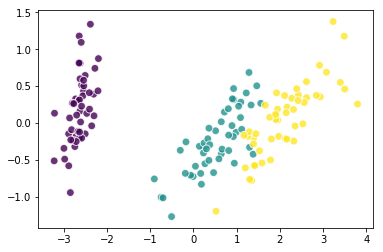

0.977685206318795

In [4]:
plt.scatter(X_pca_2c[:,0], X_pca_2c[:,1], c=iris.target, alpha=0.8, s=60, marker='o', edgecolors='white')
plt.show()
pca_2c.explained_variance_ratio_.sum()

In [5]:
#PCA - Principal Component Analysys, 3 demensions 
from sklearn.decomposition import PCA
pca_3c = PCA(n_components = 3) # reduction to 3 demensions
X_pca_3c = pca_3c.fit_transform(iris.data)
X_pca_3c.shape

(150, 3)

In [6]:
pca_3c.explained_variance_ratio_.sum()

0.9947878161267247

In [7]:
#PCA Principal Component Analysys, 4 demensions 
from sklearn.decomposition import PCA
pca_4c = PCA(n_components = 4) # reduction to 4 demensions
X_pca_4c = pca_4c.fit_transform(iris.data)
X_pca_4c.shape

(150, 4)

In [8]:
pca_4c.explained_variance_ratio_.sum()

1.0

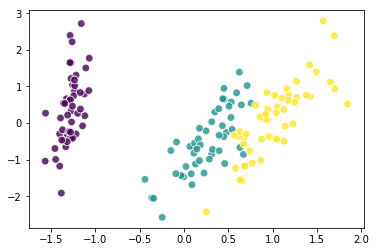

0.977685206318795

In [9]:
#PCA with whitewash
pca_2cw = PCA(n_components=2, whiten=True)
X_pca_1cw = pca_2cw.fit_transform(iris.data)
plt.scatter(X_pca_1cw[:,0], X_pca_1cw[:,1],c=iris.target,alpha=0.8, s=60, marker='o', edgecolors='white')
plt.show()
pca_2cw.explained_variance_ratio_.sum()

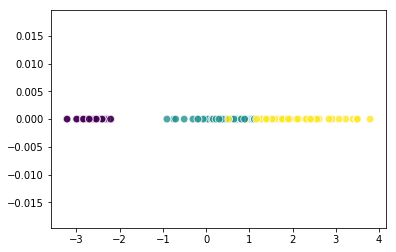

0.9246187232017272

In [10]:
#PCA 1 dimension
pca_1c = PCA(n_components=1)
X_pca_1c = pca_1c.fit_transform(iris.data)
plt.scatter(X_pca_1c[:,0], np.zeros(X_pca_1c.shape),c=iris.target,alpha=0.8, s=60, marker='o', edgecolors='white')
plt.show()
pca_1c.explained_variance_ratio_.sum()

In [11]:
#PCA at least 95% "energy" (explained_variance_ratio_) 
pca_95pc = PCA(n_components=0.95)
X_pca_95pc = pca_95pc.fit_transform(iris.data)
print(pca_95pc.explained_variance_ratio_.sum())
print(X_pca_95pc.shape) # 2 dimension are the best in that case

0.977685206318795
(150, 2)


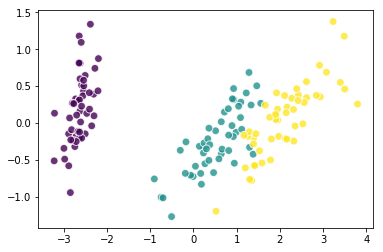

0.9776852063187945
(150, 2)


In [12]:
# Randomized PCA, mutch faster but less accurate (god for Big Data)
from sklearn.decomposition import PCA
rpca_2c = PCA(n_components=2, svd_solver='randomized')
X_rpca_2c = rpca_2c.fit_transform(iris.data)
plt.scatter(X_rpca_2c[:,0], X_rpca_2c[:,1],c=iris.target,alpha=0.8, s=60, marker='o', edgecolors='white')
plt.show()
print(rpca_2c.explained_variance_ratio_.sum())
print(X_rpca_2c.shape)

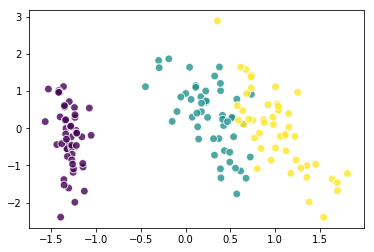

0.9776852063187945


In [13]:
# LFA - Latent Factor Analysis
from sklearn.decomposition import FactorAnalysis
fact_2c = FactorAnalysis(n_components=2) # We assume there is 2 latent factors
X_factor = fact_2c.fit_transform(iris.data)
plt.scatter(X_factor[:,0], X_factor[:,1],c=iris.target,alpha=0.8, s=60, marker='o', edgecolors='white')
plt.show()
print(rpca_2c.explained_variance_ratio_.sum())

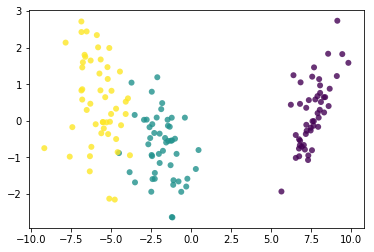

0.9999999999999999


In [14]:
# LDA - Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  as LDA  
lda_2c = LDA(n_components = 2)
X_lda_2c = lda_2c.fit_transform(iris.data, iris.target)
plt.scatter(X_lda_2c[:,0], X_lda_2c[:,1],c=iris.target,alpha=0.8, edgecolors='none')
plt.show()
print(lda_2c.explained_variance_ratio_.sum())